# FSS Comparisons with Different Time Intervals

In `freq_strain_changes.ipynb`, I analyzed "frequency-specific time series (FSSs)", including how they change with different analysis lengths, steps, and FFT sublengths. In this file, I'll look at how those characteristics compare with different time intervals.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from gwpy.timeseries import TimeSeries

# A function for making a frequency-specific strain time series
# When chosing a frequency, keep in mind the trade-off between frequency resolution and time resolution
# The available frequencies will be multiples of the 1/fftlength; however, they may not be proper
# integer multiples; chose an even power of two in order to get integer frequencies.
def freq_specific_time_series(data, start_time, analysis_length, dt, max_time, freq, fftlength=1/16.):
    lower = start_time
    upper = lower + analysis_length
    values = []
    while (upper <= max_time):
        slice = data.crop(lower, upper)
        psd = slice.psd(fftlength=fftlength)
        values += [psd.value_at(freq).value]
        lower += dt
        upper += dt
    return TimeSeries(values, None, start_time + analysis_length / 2, dt)

## The data

In this analysis, `hdata1` will be ten minutes of data from 1239082662 to 1239083262, while `hdata2` will be the same as `hdata` in the previous analysis: 1263097420 to 1263098020.

In [3]:
# Getting data
min_time1 = 1239062662
max_time1 = 1239063262
hdata1 = TimeSeries.fetch_open_data('H1', min_time1, max_time1)

min_time2 = 1263097420
max_time2 = 1263098020
hdata2 = TimeSeries.fetch_open_data('H1', min_time2, max_time2)

## Spectrogram comparison

In the spectrograms below, both have the wide bands at ~500, 1000, and between 1000-2000 Hz. Additionally, the variance at around 300 Hz continues to exist in both. Lastly, the vertical bands at low frequencies are present in both spectrograms, though in data set 1, the bands go all the way to nearly 300 Hz, whereas in the previously-analyzed data, they go only to about 200 Hz (at least visually).

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/gwpy/plot/plot.py:287: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  super().show(warn=warn)


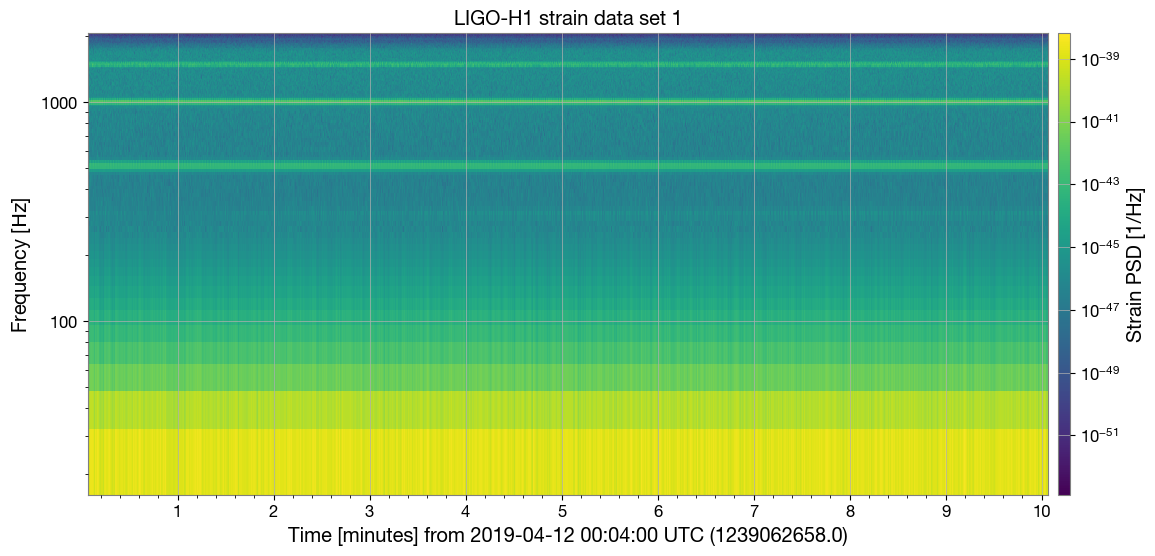

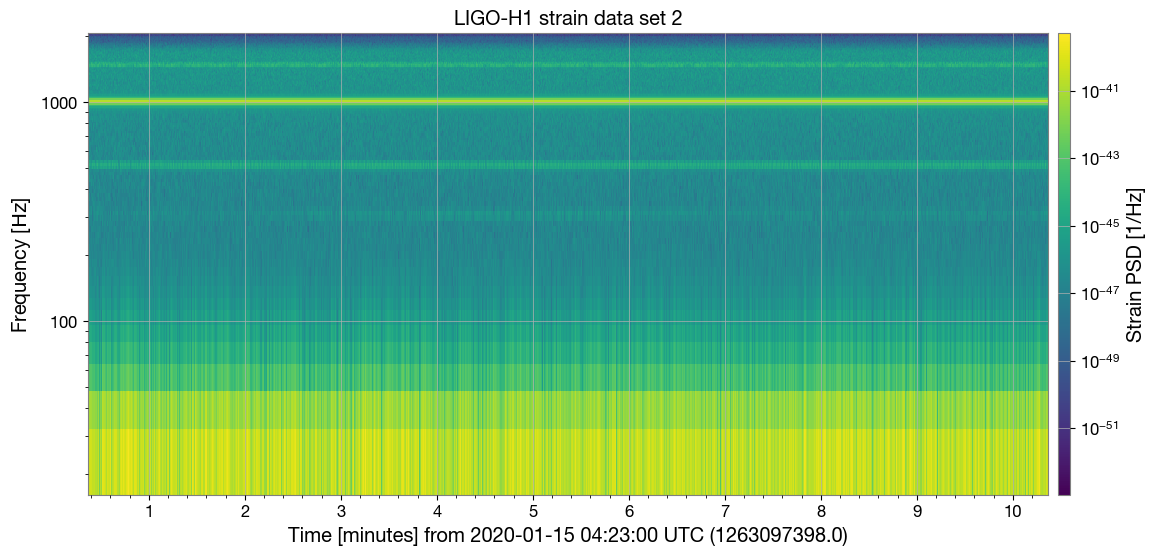

In [4]:
spectrogram = hdata1.spectrogram2(fftlength=1/16., overlap=15/256.)
plot = spectrogram.plot(norm='log', cmap='viridis', yscale='log')
ax = plot.gca()
ax.set_title('LIGO-H1 strain data set 1')
ax.colorbar(label=r'Strain PSD [1/Hz]')
plot.show()

spectrogram = hdata2.spectrogram2(fftlength=1/16., overlap=15/256.)
plot = spectrogram.plot(norm='log', cmap='viridis', yscale='log')
ax = plot.gca()
ax.set_title('LIGO-H1 strain data set 2')
ax.colorbar(label=r'Strain PSD [1/Hz]')
plot.show()

## Comparing Frequency-Specific Time Series

Do FSSs look similar with the different datasets? Examining 80 Hz and looking at the y-axis scale reveals that the intensity at 80 Hz in dataset 1 is much stronger, which is reflected in the spectrogram. Neither seems to have any key features that I can see which the other is missing.

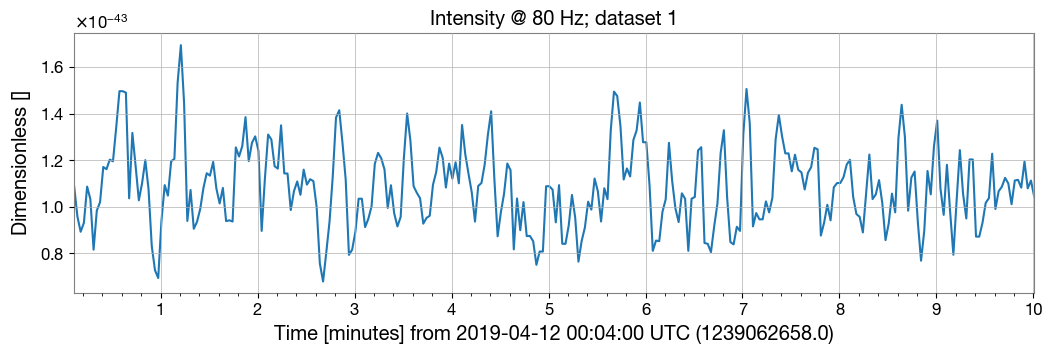

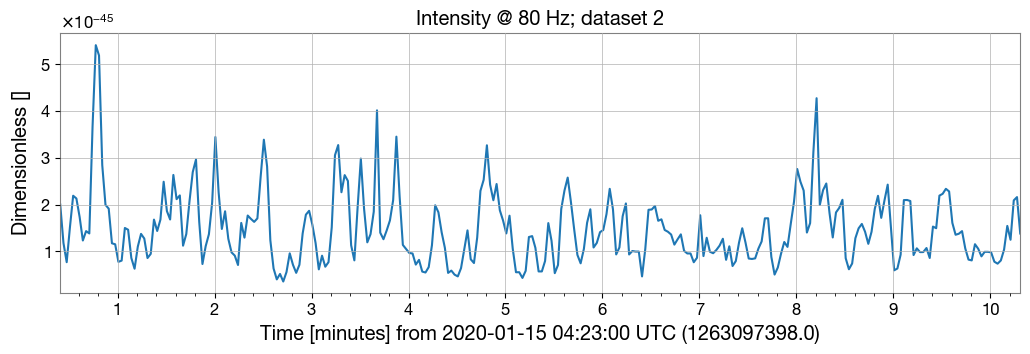

In [5]:
fss1 = freq_specific_time_series(hdata1, min_time1, 5, 2, max_time1, 80)
plot1 = fss1.plot()
ax1 = plot1.gca()
ax1.set_title('Intensity @ 80 Hz; dataset 1')
plot1.show()

fss2 = freq_specific_time_series(hdata2, min_time2, 5, 2, max_time2, 80)
plot2 = fss2.plot()
ax2 = plot2.gca()
ax2.set_title('Intensity @ 80 Hz; dataset 2')
plot2.show()

## Comparing PSDs of Frequency-Specific Time Series

Looking at the PSD of the FSS for 80 Hz with both datasets 1 and 2, they appear to be fairly similar.

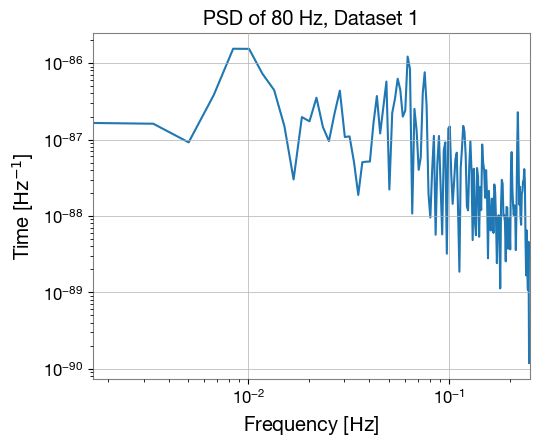

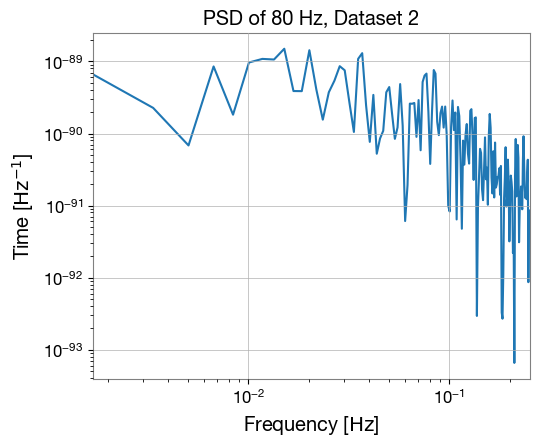

In [6]:
psd1 = fss1.psd()
plot = psd1.plot()
ax = plot.gca()
ax.set_title('PSD of 80 Hz, Dataset 1')
plot.show()

psd2 = fss2.psd()
plot = psd2.plot()
ax = plot.gca()
ax.set_title('PSD of 80 Hz, Dataset 2')
plot.show()

For next time:
- Check times more adjacent to the original time period
- Look at smaller frequencies

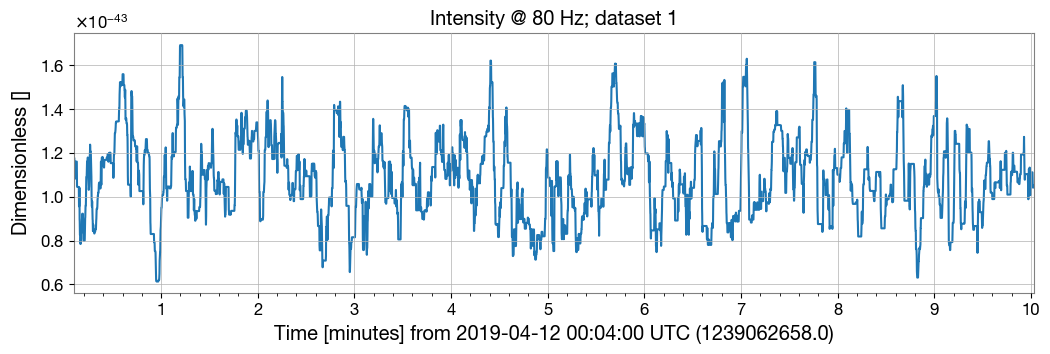

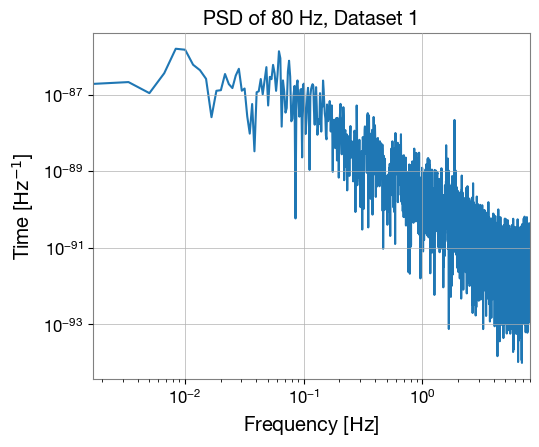

In [14]:
fss1 = freq_specific_time_series(hdata1, min_time1, 4, 0.0625, max_time1, 80)
plot1 = fss1.plot()
ax1 = plot1.gca()
ax1.set_title('Intensity @ 80 Hz; dataset 1')
plot1.show()

psd1 = fss1.psd()
plot = psd1.plot()
ax = plot.gca()
ax.set_title('PSD of 80 Hz, Dataset 1')
plot.show()